# **ДЗ №7 STEM. Алексеев Виталий**

## **0 Импорт библиотек**

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

## **1 Загрузка и предварительный анализ данных**

In [75]:
data = pd.read_csv("data_full.csv")

print("Первые 5 строк датасета:")
display(data.head())

print("\nИнформация о датасете:")
data.info()

print(f"\nОбщее количество объектов: {len(data)}")
print(f"Количество переменных звёзд (present=1): {len(data[data['present'] == 1])}")

Первые 5 строк датасета:


,RAJ2000,DEJ2000,nobs,Vmag,e_Vmag,Bmag,e_Bmag,gpmag,e_gpmag,rpmag,...,fuv_mag,nuv_mag,present,type,min_mag,max_mag,Jmag,Hmag,Kmag,period
0,141.728736,2.834912,4,13.468,0.077,14.042,0.048,13.634,0.208,15.422,...,22.714,17.651,1,RS,13.290,13.41,30.000,30.000,30.000,NaN
1,352.507671,-11.908712,17,11.185,2.511,10.404,0.164,10.150,0.154,9.764,...,18.929,14.765,1,EC,9.700,0.54,30.000,30.000,30.000,NaN
2,119.002493,21.612821,5,11.363,0.030,11.756,0.022,11.565,0.048,11.292,...,19.048,14.973,1,DSCT|GDOR|SXPHE,11.270,11.34,10.630,10.479,10.396,NaN
3,122.736110,28.142415,7,13.165,0.930,13.216,1.055,13.308,0.977,13.369,...,12.301,12.639,1,UGSU,10.500,16.30,13.166,12.951,12.829,NaN
4,222.241714,0.178571,3,15.005,0.807,15.295,1.049,15.069,0.972,14.962,...,18.330,17.027,1,RRAB,15.178,1.12,14.414,14.097,13.985,NaN



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10757 entries, 0 to 10756
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RAJ2000  10757 non-null  float64
 1   DEJ2000  10757 non-null  float64
 2   nobs     10757 non-null  int64  
 3   Vmag     10757 non-null  float64
 4   e_Vmag   10757 non-null  float64
 5   Bmag     10757 non-null  float64
 6   e_Bmag   10757 non-null  float64
 7   gpmag    10757 non-null  float64
 8   e_gpmag  10757 non-null  float64
 9   rpmag    10757 non-null  float64
 10  e_rpmag  10757 non-null  float64
 11  ipmag    10757 non-null  float64
 12  e_ipmag  10757 non-null  float64
 13  fuv_mag  10757 non-null  float64
 14  nuv_mag  10757 non-null  float64
 15  present  10757 non-null  int64  
 16  type     10757 non-null  object 
 17  min_mag  10757 non-null  float64
 18  max_mag  10745 non-null  float64
 19  Jmag     10757 non-null  float64
 20  Hmag     10757 non-null  f

**2.3 Анализ уникальных типов переменных звёзд:**  
Определяем список уникальных значений столбца `type`, чтобы понять, какие типы переменных звёзд представлены в выборке.


In [76]:
data_variable = data[data['present'] == 1].copy()

critical_cols = ['Vmag', 'Bmag', 'gpmag', 'rpmag', 'ipmag', 'type']
data_variable = data_variable.dropna(subset=critical_cols)

print(f"После фильтрации осталось объектов: {len(data_variable)}")
print("\nИнформация о датасете после фильтрации:")
data_variable.info()

После фильтрации осталось объектов: 10757

Информация о датасете после фильтрации:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10757 entries, 0 to 10756
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RAJ2000  10757 non-null  float64
 1   DEJ2000  10757 non-null  float64
 2   nobs     10757 non-null  int64  
 3   Vmag     10757 non-null  float64
 4   e_Vmag   10757 non-null  float64
 5   Bmag     10757 non-null  float64
 6   e_Bmag   10757 non-null  float64
 7   gpmag    10757 non-null  float64
 8   e_gpmag  10757 non-null  float64
 9   rpmag    10757 non-null  float64
 10  e_rpmag  10757 non-null  float64
 11  ipmag    10757 non-null  float64
 12  e_ipmag  10757 non-null  float64
 13  fuv_mag  10757 non-null  float64
 14  nuv_mag  10757 non-null  float64
 15  present  10757 non-null  int64  
 16  type     10757 non-null  object 
 17  min_mag  10757 non-null  float64
 18  max_mag  10745 non-null  float64
 19  Jmag 

In [77]:
unique_types = data_variable['type'].dropna().unique()
print(f"Количество уникальных типов переменных звёзд: {len(unique_types)}")
print("\nУникальные типы переменных звёзд в выборке:")
print(sorted(unique_types))

print("\n\nРаспределение по детальным типам (топ-20):")
type_counts = data_variable['type'].value_counts()
print(type_counts.head(20))

Количество уникальных типов переменных звёзд: 111

Уникальные типы переменных звёзд в выборке:
['ACV', 'ACV|roAm|roAp|SXARI', 'BY', 'BY+BY', 'BY+UV', 'CV', 'CW-FU|ESD', 'DQ/AE+ELL', 'DSCT', 'DSCTC', 'DSCT|EC', 'DSCT|EC|ESD', 'DSCT|GDOR|SXPHE', 'DSCT|RRC|EC|ESD', 'E', 'E+ROT', 'EA', 'EA+DSCT', 'EA+UV', 'EA/BD', 'EA/DM', 'EA/EL', 'EA/HW', 'EA/RS', 'EA/SD', 'EA/SD/RS', 'EA|EB', 'EB', 'EB/D', 'EB/DM', 'EB/DW/RS', 'EB/KE', 'EB/KW', 'EB/SD', 'EB|EW', 'EC', 'EC|CW-FO|ACV|ESD', 'EC|CW-FU|ESD', 'EC|DSCT', 'EC|DSCT|ESD', 'EC|ESD', 'EC|RRC', 'EC|RRC|DSCT', 'EC|RRC|DSCT|ESD', 'EC|RRC|ELL', 'EC|RRC|ESD', 'ED', 'ED|ESD', 'ELL', 'ELL+BY', 'ELL+DSCT', 'ELL/RS', 'EP', 'ESD', 'ESD|CW-FO|EC', 'ESD|CW-FU|CW-FO|EC', 'ESD|CW-FU|EC', 'ESD|DCEP-FU|DCEP-FO', 'ESD|DSCTr|EC|ED', 'ESD|DSCT|DSCTr|EC', 'ESD|DSCT|EC', 'ESD|EC', 'ESD|ED', 'ESD|RRC|EC', 'ESD|RRC|EC|ED', 'EW', 'EW/KE', 'EW/KW', 'EW/RS', 'EW|EA', 'GDOR', 'HADS', 'HADS(B)', 'L', 'LB', 'LPV', 'M', 'MISC|L', 'NL', 'NL/VY', 'R', 'ROT', 'RR', 'RRAB', 'RRAB/B

## **2 Создание укрупнённой классификации переменных звёзд**

### **2.1 Описание укрупнённых классов**

**1. Эруптивные (Eruptive)**  
Эти звёзды демонстрируют вспышки, выбросы массы или нерегулярные яркостные всплески (например, T Tauri, RCB, S Dor, UV‑Ceti).  
• **UV** – UV‑Ceti (флэр) → _Эруптивная_  
• **TTS/ROT** – T Tauri с ротационными эффектами → _Эруптивная (T Tauri)_  
• **YSO** – Молодой звёздный объект (обычно связаны с эруптивной активностью) → _Эруптивная_  
• **EA+UV** – Комбинация алгоритмического затменного вариабеля и UV‑эффекта → _Смешанный: затменный и эруптивный_  

**2. Пульсирующие (Pulsating)**  
К ним относятся звёзды с периодическими изменениями яркости за счёт пульсаций (RR‑лир, DSCT, Cep, Mira, SR, HADS, LPV и т.д.).  
Примеры из выборки:  
• **DSCT**, **DSCTC** – δ Scuti → _Пульсирующая_  
• **RRAB**, **RRAB/BL**, **RRC**, **RRD** – RR‑лир → _Пульсирующие_  
• **CEP**, **DCEP-FO**, **DCEP-FU**, **ACEP** – Цефеиды → _Пульсирующие_  
• **GDOR** – γ Doradus → _Пульсирующая_  
• **M**, **LPV** – Мира, долгопериодные → _Пульсирующие_  
• **HADS**, **HADS(B)** – Высокоамплитудные δ Scuti → _Пульсирующие_  
• **SRS**, **SR**, **SRB**, **SRD** – полупериодические/нерегулярные красные → _Пульсирующие_  
• **V1093HER** – пульсирующие субкарманы → _Пульсирующая_  
• **DCEP-FO**, **CW‑FO**, **CW‑FU** – типы переменных W Virginis (цефеиды) → _Пульсирующие_  
• **BCEP|DSCT**, **PULS** – явно пульсирующие (или с неопределённым типом пульсаций) → _Пульсирующие_  

**3. Ротационные (Rotating)**  
Здесь попадают звёзды, в яркостях которых доминирует эффект ротационных пятен или магнитной активности (например, ACV, BY Dra, FK Com, PSR).  
• **RS** – часто используется для RS CVn (связано с ротационной активностью) → _Ротационные_  
• **ROT** – ротационные звёзды → _Ротационные_  
• **ACV** (и составные с ACV, например, «ACV|roAm|roAp|SXARI», «ACV|CW‑FO») – типичные магнитные переменные → _Ротационные_  
• **BY**, **BY+UV**, **BY+BY** – тип BY Draconis → _Ротационные_  
• **ELL**, **ELL+DSCT**, **ELL+BY** – эллипсоидальные (часто ротационные) → _Ротационные (или смешанные, если с пульсирующими)_  
• **E+ROT** – сочетание эффекта затмения и ротации → _Смешанный: затменный и ротационный_  
• **R** – отражательный эффект в бинарных системах (часто с ротационной синхронизацией) → _Ротационные_  

**4. Катаклизмические (Cataclysmic)**  
Это системы с резкими всплесками яркости (взрывы, новы, переменные типа U Gem, CV, AM, DQ, N, NL и т.д.).  
• **UGSU**, **UGSS+E**, **UG/DQ**, **UGZ/IW**, **UG** – переменные типа U Geminorum (карлик-новые) → _Катаклизмические_  
• **NL**, **NL/VY** – новолинейные → _Катаклизмические_  
• **CV** – каталитические переменные → _Катаклизмические_  
• **N**, **NA**, **NB**, **NC**, **NR** – новы → _Катаклизмические_  
• **DQ** – тип DQ Herculis → _Катаклизмические_  
• **WD** – бинарные с белым карликом (часто в контексте катаклизмических систем) → _Катаклизмические_  

**5. Затменные (Eclipsing)**  
Сюда входят системы, где изменения яркости обусловлены затмениями компонентов (EA, EB, EW, EC, ED, ESD, EP и т.п.).  
• **EA**, **EA/SD**, **EA/DM**, **EA/RS**, **EA/EL**, **EA/HW**, **EA|EB**, **EW**, **EB**, **E**, **ED**, **ESD**  
• **EC** – контактные системы → _Затменные_  
• **EP** – звёзды с планетарными затмениями → _Затменные_  
• Составные, например:  
  – **DSCT|RRC|EC|ESD**, **ESD|DSCT|EC**, **ESD|CW‑FU|CW‑FO|EC**, **DSCT|EC|ESD**, **EC|DSCT**, **EC|RRC|DSCT**, **EC|RRC**, **ESD|EC**, **EB/SD**, **EB|EW**, **EB/KW**, **EB/KE**, **EB/DW/RS**, **ESD|EC**, **EC|CW‑FO|ACV|ESD** и т.д.  
  Если присутствует компонент, относящаяся к затменным (EA, EB, EC, ESD, ED, EW), то система относится к _затменным_; при наличии ещё пульсирующей или ротационной составляющей – её отмечают как смешанную (см. ниже).

**6. Рентгеновские (X‑ray)**  
В этой группе переменные, связанные с яркой рентгеновской эмиссией (XB, XP и подобные).  
В представленной выборке прямых обозначений X‑ray почти нет. (Например, X, XB, XP, XBR, XPR не встречаются.)  
Если они появятся, их нужно было бы отнести сюда.

**7. Уникальные (Unique)**  
Это все случаи, которые либо трудно классифицировать, либо относятся к экзотическим/внезвёздным объектам (например, QSO, GAL, MISC, VAR, CST, S – необработанные или неоднозначные переменные).  
• **MISC** – разнородная группа → _Уникальные_  
• **VAR** – переменная неопределённого типа → _Уникальные_  
• **MISC|L** – содержит MISC → _Уникальные_  
• **S** – малоизученные переменные → _Уникальные_  
• **Galaxy** – экстрагалактический объект → _Уникальные_

**Замечания:**  
– В составных обозначениях знак "|" означает неопределённость – звезда может принадлежать к любому из указанных типов, а знак "+" – одновременное наличие двух эффектов.  
– Если встречаются смешанные типы, звезда может демонстрировать свойства сразу двух (и более) групп.  
– Отсутствующие значения (nan) остаются не классифицированными.

### Почему выбраны именно такие укрупнённые классы?

Это распределение базируется на общепринятых обозначениях ОКПЗ и описаниях, приведённых в литературе (например, Samus et al. 2009). Таким образом, выбранные укрупнённые классы соответствуют основным физическим процессам, вызывающим вариабельность звёзд, и позволяют свести множество детальных обозначений к относительно небольшому числу групп, понятных как с теоретической, так и с прикладной точки зрения.


### 2.2 Приоритет присвоения классов

Если в типе встречаются несколько компонентов (например, DSCT|RRC|EC|ESD), то согласно установленному приоритету присваивается класс с наивысшим приоритетом:

**Приоритет:**  
1. Eclipsing  
2. Cataclysmic  
3. Pulsating  
4. Rotating  
5. Eruptive  
6. X‑ray  
7. Unique  

Таким образом, если в составе типа есть элемент, относящийся к «Eclipsing», объект классифицируется как Eclipsing, даже если присутствуют признаки пульсирующих или ротационных переменных.

### Почему приоритет был выбран именно в следующем порядке?

**1. Eclipsing (Затменные):**  
Затменные системы дают очень характерные световые кривые с отчетливыми минимумами. Геометрический эффект затмений обычно доминирует даже в присутствии других эффектов.

**2. Cataclysmic (Катаклизмические):**  
Катаклизмические объекты характеризуются резкими всплесками яркости, связанными с экстремальными физическими процессами (аккреция, термоядерные реакции).

**3. Pulsating (Пульсирующие):**  
Пульсирующие звёзды (Mira, Cepheids, RR Lyrae, δ Scuti) имеют строго периодические и предсказуемые изменения яркости.

**4. Rotating (Ротационные):**  
Ротационные эффекты обычно вызывают плавное и периодическое изменение яркости за счёт наличия пятен или неравномерностей поверхности.

**5. Eruptive (Эруптивные):**  
Эруптивные звёзды демонстрируют нерегулярные вспышки и выбросы массы, которые не всегда имеют строгую периодичность.

**6. X‑ray (Рентгеновские):**  
Рентгеновская активность, как правило, ассоциируется с экстремальными объектами (нейтронные звёзды, чёрные дыры).

**7. Unique (Уникальные):**  
Эта группа включает объекты, для которых невозможно однозначно определить физический механизм изменения яркости.


### 2.3 Определение списков ключевых слов

In [78]:
eruptive_keywords = [
    'FUOR', 'GCAS', 'CTTS', 'WTTS', 'TTAU', 'EXOR', 'RCB', 'SDOR', 'UV', 'YSO', 'DPV'
]

pulsating_keywords = [
    'CEP', 'DCEP', 'DCEPS', 'DCEP-FO', 'DCEP-FU', 'ACEP', 
    'CW', 'CW-FU', 'CW-FO',
    'DSCT', 'DSCTC', 'M', 'MIRA', 
    'RR', 'RRAB', 'RRC', 'RRD', 'RV', 
    'SR', 'SRA', 'SRB', 'SRC', 'SRD', 
    'BCEP', 'BCEPS', 'ZZ', 'ACYG', 'SXPHE', 
    'PVTEL', 'PVTELI', 'PVTELII', 'PVTELIII', 
    'GDOR', 'HADS', 'HADS(B)', 'PULS',
    'LB', 'V1093HER', 'SRS', 'CWA', 'CWB', 'L', 'LPV', 'ZZA'
]

# Ключевые слова для ротационных переменных
rotating_keywords = [
    'ROT', 'BY', 'ELL', 'ACV', 'FKCOM', 'SXARI', 'PSR', 'RS', 'R'
]

cataclysmic_keywords = [
    'UG', 'UGER', 'UGSS', 'UGSU', 'UGZ', 
    'N', 'SN', 'NOV', 'AM', 'ZAND', 'CV', 'DQ', 'NON-CV',
    'NL/VY', 'NL', 'WD'
]

eclipsing_keywords = [
    'E', 'EA', 'EB', 'EW', 'EC', 'ED', 'ESD', 'EP', 'EL', 'ALGOL', 'BLYR', 'WUMA'
    # Примеры: EA, EB, EW, EC, а также вариации типа ED, ESD, EP.
]

xray_keywords = [
    'X', 'XB', 'XF', 'XI', 'XJ', 'XN', 'XP', 'XPR', 'XPRM'
]

unique_keywords = [
    'BLLAC', 'QSO', 'GAL', 'CST', 'MISC', 'VAR', 'NON-STAR', 'S', 'GALAXY'
]

### 2.4 Функция классификации по укрупнённым классам

Функция `classify_into_classes` принимает строковое значение детального типа звезды и возвращает укрупнённый класс. При этом:
- Если значение отсутствует или не является строкой, возвращается "Unknown".
- Строка приводится к верхнему регистру, затем разбивается по разделителям (пробел, "|", "/" или "+").
- По установленному приоритету (сначала проверяются ключевые слова затменных, затем катаклизмических, пульсирующих, ротационных, эруптивных, рентгеновских и, наконец, уникальных) возвращается соответствующий класс.

Если в типе встречается несколько ключевых слов, выбирается класс с наивысшим приоритетом.


In [79]:
def classify_into_classes(original_type: str) -> str:
    if not isinstance(original_type, str) or pd.isna(original_type):
        return "Unknown"
    
    tokens = re.split(r'[\s|/+]+', original_type.strip().upper())
    
    def contains_keyword(tokens, keywords):
        return any(token in keywords for token in tokens)
    
    if contains_keyword(tokens, eclipsing_keywords):
        return "Eclipsing"
    elif contains_keyword(tokens, cataclysmic_keywords):
        return "Cataclysmic"
    elif contains_keyword(tokens, pulsating_keywords):
        return "Pulsating"
    elif contains_keyword(tokens, rotating_keywords):
        return "Rotating"
    elif contains_keyword(tokens, eruptive_keywords):
        return "Eruptive"
    elif contains_keyword(tokens, xray_keywords):
        return "X-ray"
    elif contains_keyword(tokens, unique_keywords):
        return "Unique"
    else:
        return "Unknown"

### 2.5 Применение функции классификации и анализ распределения классов

Применим функцию `classify_into_classes` к столбцу `type` нашего датасета и посмотрим, как распределяются объекты по укрупнённым классам.  

Обратите внимание, что распределение может быть дисбалансированным – например, в нашем датасете пульсирующих объектов может быть значительно больше, чем эруптивных или катаклизмических.


In [80]:
data_variable['class'] = data_variable['type'].apply(classify_into_classes)

print("Распределение классов до фильтрации (все объекты):")
print(data_variable['class'].value_counts())

print("\n\nПроверка корректности классификации для класса Unique:")
unique_types_in_class = data_variable[data_variable['class'] == 'Unique']['type'].unique()
print(f"Уникальные типы в классе Unique: {sorted(unique_types_in_class)}")

Распределение классов до фильтрации (все объекты):
class
Rotating       4303
Pulsating      4063
Eclipsing      1623
Unique          697
Eruptive         51
Cataclysmic      20
Name: count, dtype: int64


Проверка корректности классификации для класса Unique:
Уникальные типы в классе Unique: ['VAR']


### 2.6 Исключение классов "Unique" и "Unknown"

Для упрощения дальнейшего анализа (и для обучения моделей) мы будем работать только с объектами, для которых удалось однозначно классифицировать тип. Поэтому исключим объекты, отнесённые к классам "Unique" и "Unknown".  

Это позволит снизить уровень шума, так как эти группы содержат разнородные и зачастую недостаточно изученные объекты.


Распределение классов после удаления 'Unique' и 'Unknown':
class
Rotating       4303
Pulsating      4063
Eclipsing      1623
Eruptive         51
Cataclysmic      20
Name: count, dtype: int64


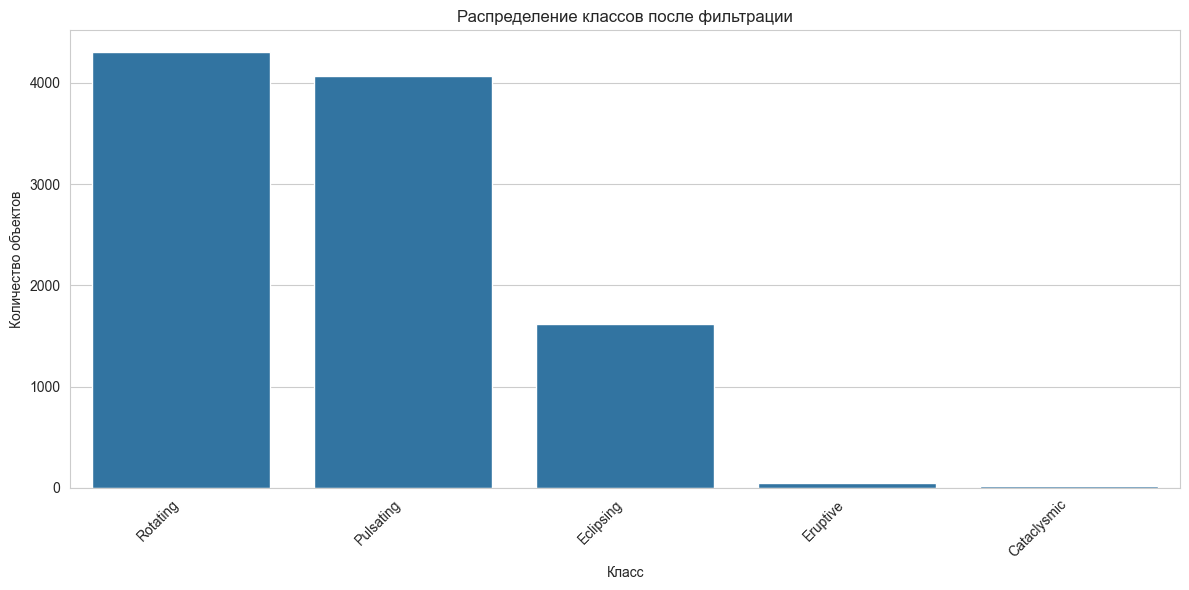

In [81]:
data_filtered = data_variable[(data_variable['class'] != 'Unique') & (data_variable['class'] != 'Unknown')]

print("Распределение классов после удаления 'Unique' и 'Unknown':")
print(data_filtered['class'].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(x='class', data=data_filtered, order=data_filtered['class'].value_counts().index)
plt.title('Распределение классов после фильтрации')
plt.xlabel('Класс')
plt.ylabel('Количество объектов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('practice12_class_distribution_filtered.png', dpi=300, bbox_inches='tight')
plt.show()

**Замечание:** Как мы видим, эруптивных и катаклизмических объектов очень мало относительно других. 

Можно рассмотреть объединение эруптивных и катаклизмических в одну группу, поскольку в обоих случаях есть наличие резких, кратковременных всплесков яркости, но у них крайне разная физическая природа объекта.

- **Эруптивные переменные (Eruptive)** включают, например, T Tauri, флаеры типа UV Ceti, LBV (например, S Doradus), RCB и подобные – это в основном одиночные звёзды или молодые объекты, у которых внезапные вспышки связаны с выбросами массы или магнитной активностью.

- **Катаклизмические переменные (Cataclysmic)** – это, как правило, интерактивные бинарные системы с белым карликом (например, U Geminorum, новы, CV, DQ Her), у которых всплеск яркости обусловлен аккреционными процессами и термоядерными вспышками.

Спектрально они могут различаться: эруптивные звёзды часто показывают характеристики молодых объектов с активной аккрецией или корональной активностью, а катаклизмические – признаки аккреционного диска, эмиссионные линии, иногда сильное рентгеновское излучение.

В нашем датасете редкие объекты этих типов представлены в малом количестве, поэтому для некоторых прикладных задач можно объединить их в одну «взрывную» группу. Главное — понимать, что физическая природа различна, и если важны именно механизм и спектральные особенности, то объединение может исказить анализ.


## **3 Подготовка данных для обучения модели**

Выделим признаки, используемые для классификации, и целевую переменную. Поскольку данные уже содержат инфракрасные измерения из 2MASS, мы можем использовать более широкий набор признаков.

**Используемые признаки:**  
 - Фотометрические величины: Vmag, Bmag, gpmag, rpmag, ipmag, fuv_mag, nuv_mag, Jmag, Hmag, Kmag
 - Ошибки измерений: e_Vmag, e_Bmag, e_gpmag, e_rpmag, e_ipmag
 
**Целевая переменная:**  
 - Укрупнённый класс переменной звезды (столбец `class`).


In [82]:
data_for_training = data_filtered.copy()

feature_cols = ['Vmag', 'e_Vmag', 'Bmag', 'e_Bmag', 'gpmag', 'e_gpmag',
                'rpmag', 'e_rpmag', 'ipmag', 'e_ipmag', 
                'fuv_mag', 'nuv_mag', 'Jmag', 'Hmag', 'Kmag']

available_features = [col for col in feature_cols if col in data_for_training.columns]
print(f"Доступные признаки: {len(available_features)} из {len(feature_cols)}")

data_for_training = data_for_training.dropna(subset=available_features + ['class'])

X = data_for_training[available_features]
y = data_for_training['class']

print(f"\nИтоговое количество объектов: {len(X)}")
print(f"Количество классов: {len(y.unique())}")
print(f"\nРаспределение классов:")
print(y.value_counts())

Доступные признаки: 15 из 15

Итоговое количество объектов: 10060
Количество классов: 5

Распределение классов:
class
Rotating       4303
Pulsating      4063
Eclipsing      1623
Eruptive         51
Cataclysmic      20
Name: count, dtype: int64


## **4 Разделение данных на обучающую и тестовую выборки**

Разобьём данные с использованием стратифицированного разбиения, чтобы сохранить пропорции классов.


In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Распределение классов в обучающей выборке:")
print(y_train.value_counts())

print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts())


Распределение классов в обучающей выборке:
class
Rotating       3442
Pulsating      3251
Eclipsing      1298
Eruptive         41
Cataclysmic      16
Name: count, dtype: int64

Распределение классов в тестовой выборке:
class
Rotating       861
Pulsating      812
Eclipsing      325
Eruptive        10
Cataclysmic      4
Name: count, dtype: int64


## **5 Обучение моделей и оценка качества**

Для борьбы с дисбалансом классов используем методы балансировки. Здесь продемонстрируем работу BalancedRandomForestClassifier.

### BalancedRandomForestClassifier
- **Что это:**  
  Реализованный в библиотеке imblearn (imbalanced-learn), BalancedRandomForestClassifier — это модификация RandomForestClassifier, предназначенная для работы с несбалансированными данными.
  
- **Как работает:**  
  На каждом шаге формирования бутстрэп-выборки для обучения отдельного дерева алгоритм случайным образом _undersamples_ (уменьшает) большинство классов так, чтобы в полученной выборке классы были сбалансированы. Таким образом, каждое дерево обучается на наборе данных, где количество объектов каждого класса примерно одинаково.

- **Преимущества:**  
  Это помогает повысить чувствительность модели к классам меньшинства и улучшает общую эффективность классификации при сильном дисбалансе. Благодаря сбалансированным выборкам ошибки, связанные с доминированием большинства, уменьшаются.



=== Результаты BalancedRandomForestClassifier ===
Accuracy: 0.6709741550695825

Classification Report:
              precision    recall  f1-score   support

 Cataclysmic       0.03      0.50      0.05         4
   Eclipsing       0.41      0.45      0.43       325
    Eruptive       0.06      0.60      0.11        10
   Pulsating       0.79      0.69      0.74       812
    Rotating       0.82      0.74      0.78       861

    accuracy                           0.67      2012
   macro avg       0.42      0.60      0.42      2012
weighted avg       0.74      0.67      0.70      2012



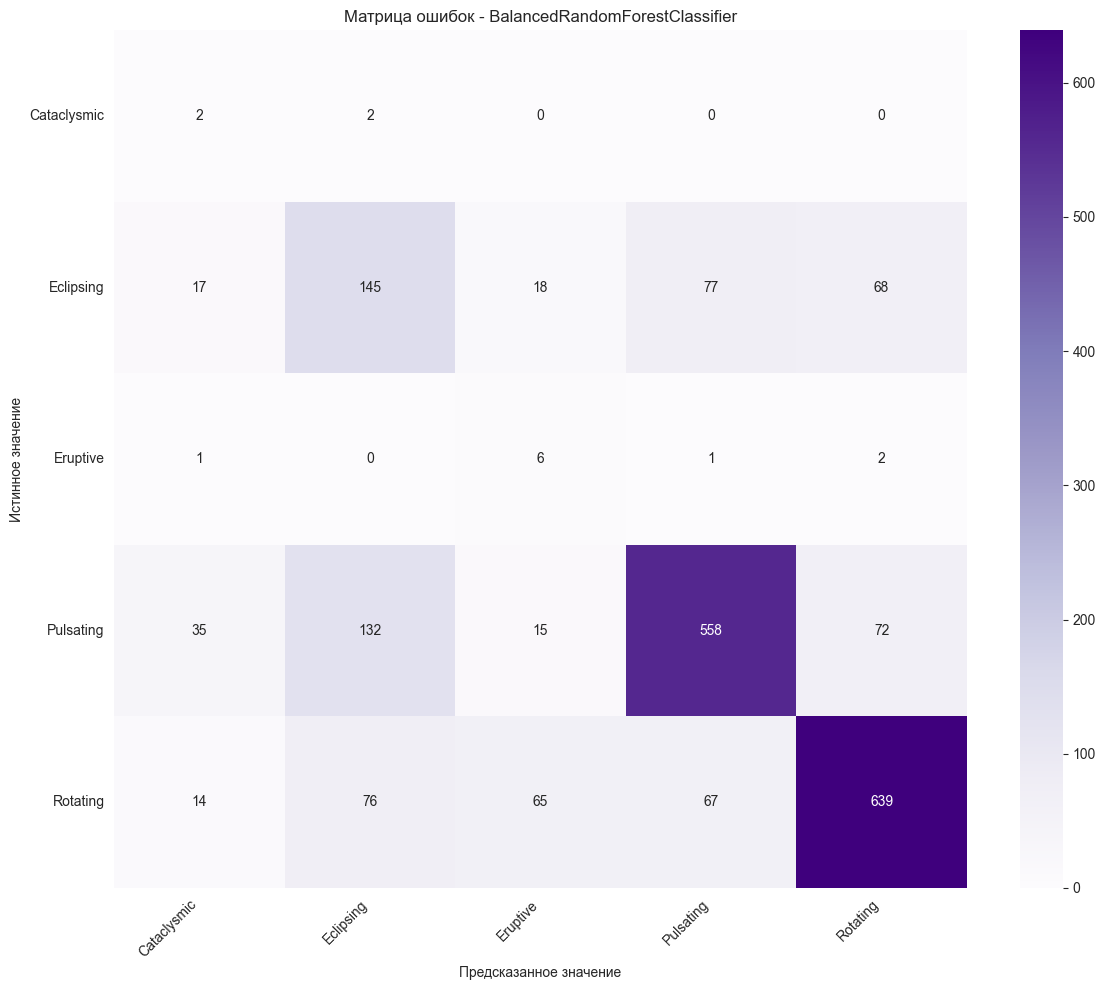

In [84]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)
y_pred_brf = brf.predict(X_test)

print("\n=== Результаты BalancedRandomForestClassifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_brf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_brf))

cm_brf = confusion_matrix(y_test, y_pred_brf, labels=brf.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_brf, annot=True, fmt='d', cmap='Purples',
            xticklabels=brf.classes_, yticklabels=brf.classes_)
plt.title('Матрица ошибок - BalancedRandomForestClassifier')
plt.xlabel('Предсказанное значение')
plt.ylabel('Истинное значение')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('practice12_confusion_matrix_brf.png', dpi=300, bbox_inches='tight')
plt.show()

## **6 Анализ важности признаков**

Определим, какие признаки наиболее важны для модели BalancedRandomForestClassifier.

Анализ важности признаков – это метод интерпретации работы модели машинного обучения, который позволяет определить, какой вклад в итоговое предсказание вносит каждый из входных признаков. 

**Зачем нужен анализ важности признаков:**
- **Интерпретация модели:** Позволяет понять, какие факторы являются ключевыми для принятия решения моделью.
- **Выбор признаков:** Помогает выявить нерелевантные или шумовые признаки, которые можно исключить из модели.
- **Диагностика:** Если модель опирается на признаки, которые не соответствуют физическим ожиданиям, это может сигнализировать о проблемах в данных.
- **Снижение размерности:** Отбор наиболее значимых признаков позволяет упростить модель и снизить риск переобучения.


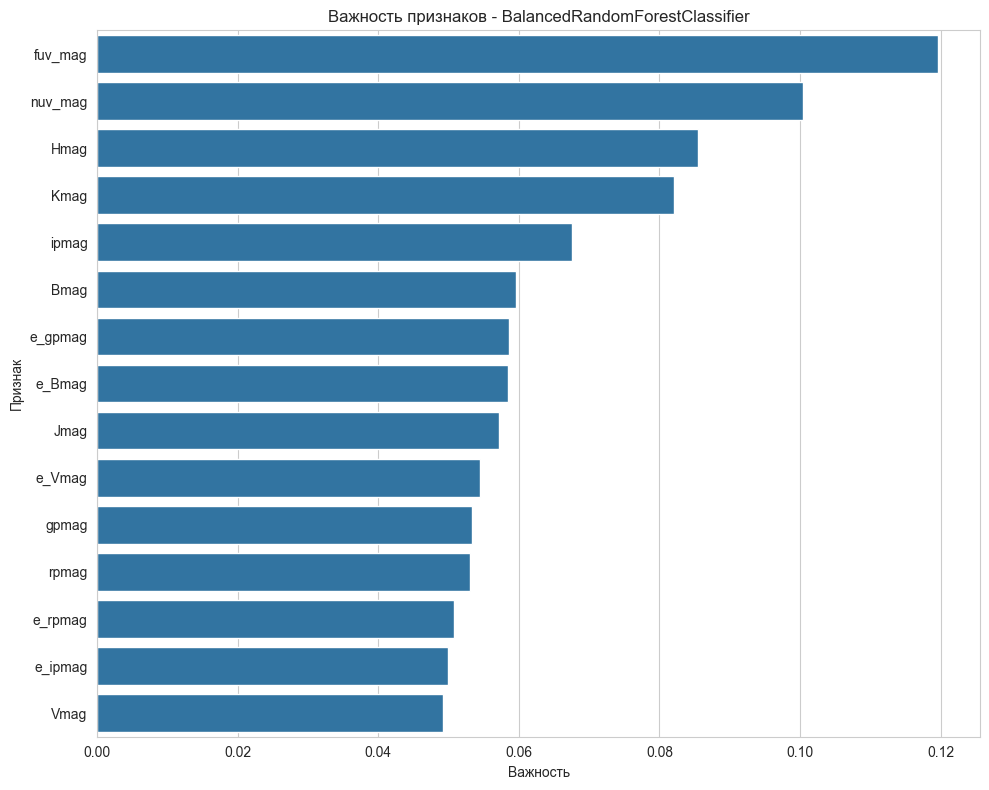


Топ-10 наиболее важных признаков:
fuv_mag    0.119636
nuv_mag    0.100420
Hmag       0.085515
Kmag       0.082030
ipmag      0.067546
Bmag       0.059569
e_gpmag    0.058654
e_Bmag     0.058507
Jmag       0.057159
e_Vmag     0.054452
dtype: float64


In [85]:
importances = brf.feature_importances_
feature_importances = pd.Series(importances, index=available_features).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Важность признаков - BalancedRandomForestClassifier')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.tight_layout()
plt.savefig('practice12_feature_importances_brf.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nТоп-10 наиболее важных признаков:")
print(feature_importances.head(10))

## **7 Сохранение датасета с классификацией**

Сохраним обработанный датасет с созданной колонкой `class` для использования в следующих семинарах.


In [86]:
data_to_save = data_for_training.copy()

output_filename = 'data_full_classified.csv'
data_to_save.to_csv(output_filename, index=False)

print(f"Датасет сохранён в файл: {output_filename}")
print(f"Количество объектов: {len(data_to_save)}")
print(f"Количество колонок: {len(data_to_save.columns)}")
print(f"\nКолонки в сохранённом датасете:")
print(list(data_to_save.columns))
print(f"\nРаспределение классов в сохранённом датасете:")
print(data_to_save['class'].value_counts())

Датасет сохранён в файл: data_full_classified.csv
Количество объектов: 10060
Количество колонок: 24

Колонки в сохранённом датасете:
['RAJ2000', 'DEJ2000', 'nobs', 'Vmag', 'e_Vmag', 'Bmag', 'e_Bmag', 'gpmag', 'e_gpmag', 'rpmag', 'e_rpmag', 'ipmag', 'e_ipmag', 'fuv_mag', 'nuv_mag', 'present', 'type', 'min_mag', 'max_mag', 'Jmag', 'Hmag', 'Kmag', 'period', 'class']

Распределение классов в сохранённом датасете:
class
Rotating       4303
Pulsating      4063
Eclipsing      1623
Eruptive         51
Cataclysmic      20
Name: count, dtype: int64


## **8 Альтернативная схема укрупнённых классов**

In [87]:
data_alt = data_to_save.copy()
data_alt["class_alt"] = data_alt["class"].apply(
    lambda cls: cls if cls in ["Eclipsing", "Pulsating"] else "Other"
)
class_dist = pd.DataFrame(data_alt["class_alt"].value_counts())
class_dist["frac"] = class_dist["count"].apply(lambda x: x / class_dist["count"].sum() * 100)
class_dist

,count,frac
class_alt,,
Other,4374,43.479125
Pulsating,4063,40.387674
Eclipsing,1623,16.133201



=== Результаты BalancedRandomForestClassifier ===
Accuracy: 0.8166003976143141

Classification Report:
              precision    recall  f1-score   support

   Eclipsing       0.57      0.52      0.54       325
       Other       0.87      0.89      0.88       875
   Pulsating       0.85      0.85      0.85       812

    accuracy                           0.82      2012
   macro avg       0.76      0.75      0.76      2012
weighted avg       0.81      0.82      0.81      2012



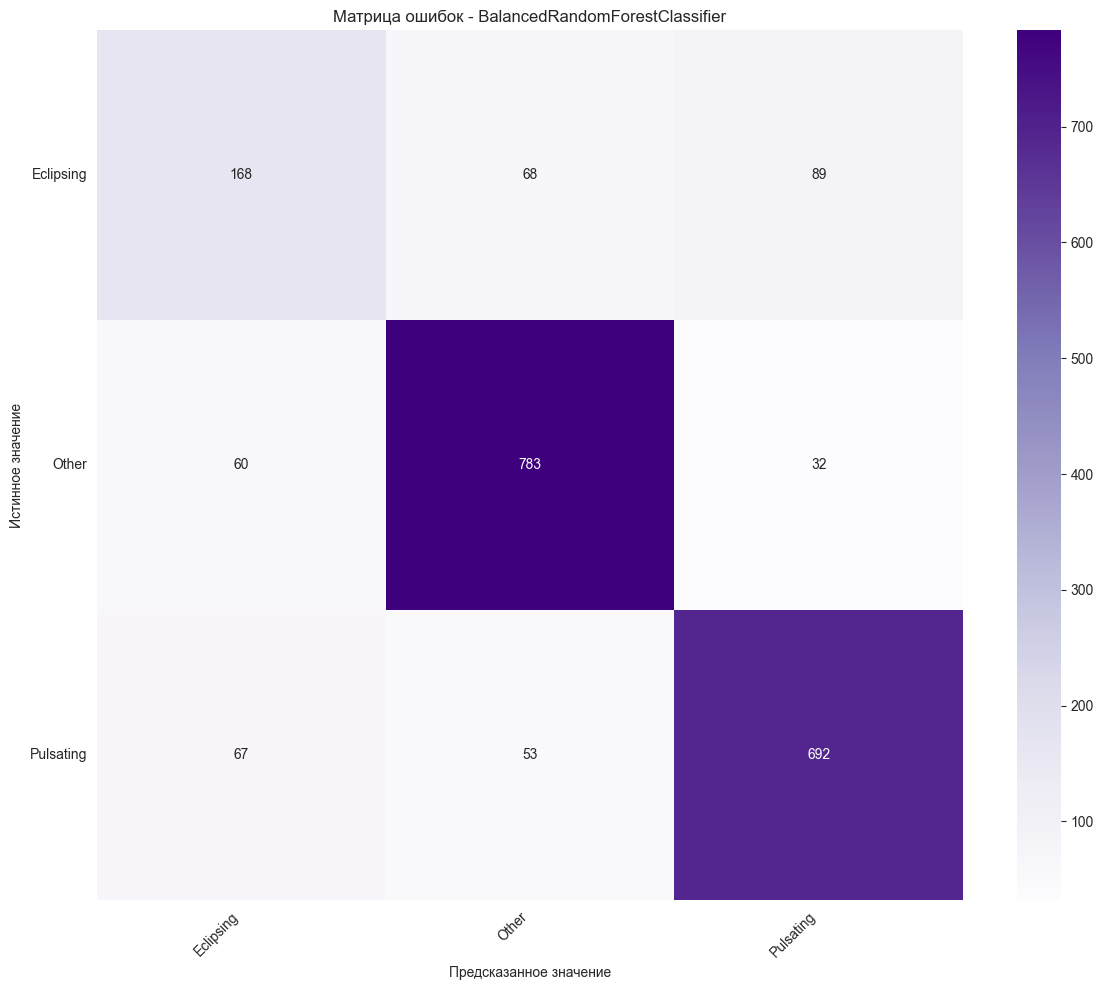

In [88]:
y = data_alt['class_alt']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)
y_pred_brf = brf.predict(X_test)

print("\n=== Результаты BalancedRandomForestClassifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_brf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_brf))

cm_brf = confusion_matrix(y_test, y_pred_brf, labels=brf.classes_)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_brf, annot=True, fmt='d', cmap='Purples',
            xticklabels=brf.classes_, yticklabels=brf.classes_)
plt.title('Матрица ошибок - BalancedRandomForestClassifier')
plt.xlabel('Предсказанное значение')
plt.ylabel('Истинное значение')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Прирост точности составил $\approx 20\%$, из матрицы ошибок видно, что модель стала гораздо чаще угадывать верный класс, интуитивно это очевидно: чем больше площадь доски для игры в дартс, тем выше шанс попасть в центр.

Менее всего изменения коснулись класса `Eclipsing` и его метрик (около $+10\%$), остальные же приобрели гораздо более точные показатели ($\approx+30\%$).

## **9 Чувствительность к приоритетам классов**

In [89]:
def map_type_to_class(original_type: str) -> str:
    if not isinstance(original_type, str) or pd.isna(original_type):
        return "Unknown"

    tokens = re.split(r'[\s|/+]+', original_type.strip().upper())

    def contains_keyword(tokens, keywords):
        return any(token in keywords for token in tokens)
    if contains_keyword(tokens, eruptive_keywords):
        return "Pulsating"
    elif contains_keyword(tokens, eclipsing_keywords):
        return "Eclipsing"
    elif contains_keyword(tokens, cataclysmic_keywords):
        return "Cataclysmic"
    elif contains_keyword(tokens, pulsating_keywords):
        return "Rotating"
    elif contains_keyword(tokens, rotating_keywords):
        return "Eruptive"
    elif contains_keyword(tokens, xray_keywords):
        return "X-ray"
    elif contains_keyword(tokens, unique_keywords):
        return "Unique"
    else:
        return "Unknown"

data_alt.rename(columns={"class": "class_coarse_orig"}, inplace=True)
data_alt['class_coarse_new'] = data_alt['type'].apply(map_type_to_class)
data_alt = data_alt[
    (data_alt['class_coarse_orig'] != 'Unique') & (data_alt['class_coarse_new'] != 'Unknown')
]

In [90]:
amount_changed = len(data_alt.loc[data_alt["class_coarse_orig"] != data_alt["class_coarse_new"]])

print(f"Число объектов, у которых класс изменился: {amount_changed}")
print(f"Их доля: {amount_changed / len(data_alt) * 100}%")

print("Таблица переходов:")
pd.crosstab(
    data_alt['class_coarse_orig'],
    data_alt['class_coarse_new'],
    margins=True
)

Число объектов, у которых класс изменился: 8418
Их доля: 83.67793240556661%
Таблица переходов:


class_coarse_new,Cataclysmic,Eclipsing,Eruptive,Pulsating,Rotating,All
class_coarse_orig,,,,,,
Cataclysmic,20,0,0,0,0,20
Eclipsing,0,1622,0,1,0,1623
Eruptive,0,0,0,51,0,51
Pulsating,0,0,0,0,4063,4063
Rotating,0,0,4301,2,0,4303
All,20,1622,4301,54,4063,10060


Выбор приоритета **катастрофически** влияет на итоговое распределение классов в итоговой модели. Изменение даже одного звена меняет метку у $\approx80%$ значений, что очевидно повлечет за собой изменение всех весов в обучающей выборке.

Чаще всего коллизии случаются у ротационных и эруптивных звезд (более половины всех значений), еще около половины приходится на ротационные и пульсирующие.

Как и было отмечено ранее, обучение на предыдущей выборке и сам выбор приоритета сильно влияет на процесс обучения, поэтому важно фиксировать их перед фиттингом модели.

## **10 Влияние набора признаков**

In [91]:
from itertools import combinations

bands = {
    'B': 'Bmag',
    'V': 'Vmag',
    'g': 'gpmag',
    'r': 'rpmag',
    'i': 'ipmag'
}
bands_names = []
for b1, b2 in combinations(bands.keys(), 2):
    col1, col2 = bands[b1], bands[b2]
    new_col = f"{b1}-{b2}"
    bands_names.append(new_col)
    data_alt[new_col] = data_alt[col1] - data_alt[col2]

data_alt["J-K"] = data_alt["Jmag"] - data_alt["Kmag"]
data_alt["NUV-V"] = data_alt["nuv_mag"] - data_alt["Vmag"]

In [92]:
feature_cols = ['Vmag', 'e_Vmag', 'Bmag', 'e_Bmag', 'gpmag', 'e_gpmag',
                'rpmag', 'e_rpmag', 'ipmag', 'e_ipmag',
                'fuv_mag', 'nuv_mag', 'Jmag', 'Hmag', 'Kmag',
                *bands_names
            ]

A = ["Vmag", "Bmag", "gpmag", "rpmag", "ipmag", *bands_names]
B = [*A, 'Jmag', "Hmag", "Kmag", 'J-K']
C = [*A, "fuv_mag", "nuv_mag", "NUV-V"]

sample_names: list[str] = ["A", "B", "C"]

results = []

for i, sample in enumerate([A, B, C]):
    available_features = [col for col in sample if col in data_alt.columns]

    data_alt = data_alt.dropna(subset=available_features + ['class_coarse_orig'])

    X = data_alt[available_features]
    y = data_alt['class_coarse_orig']

    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
    )
    brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
    brf.fit(X_train, y_train)
    y_pred = brf.predict(X_test)

    # Метрики
    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')

    # F1 для выбранных классов (массив из 2 значений)
    f1_selected = f1_score(y_test, y_pred, labels=['Eclipsing', 'Pulsating'], average=None, zero_division=0)
    f1_eclipsing, f1_pulsating = f1_selected

    results.append({
        'Набор': sample_names[i],
        'Accuracy': round(acc, 3),
        'Macro-F1': round(macro_f1, 3),
        'F1_Eclipsing': round(f1_eclipsing, 3),
        'F1_Pulsating': round(f1_pulsating, 3)
    })

pd.DataFrame(results)

,Набор,Accuracy,Macro-F1,F1_Eclipsing,F1_Pulsating
0,A,0.663,0.412,0.363,0.781
1,B,0.686,0.429,0.360,0.789
2,C,0.687,0.428,0.359,0.792


Нетрудно заметить, что набор `A` дает наилучшее качество (все показатели выше остальных). Для `Eclipsing` ИК данные сильно ухудшают метрики, точно так же и для пульсирующих. В общем и целом, это соответствует ожидаемому, поскольку указанные типы звезд слабо излучают в указанных диапазонах (ИК и УФ).

## **11 Мини-отчёт: что мы узнали о классификации переменных звёзд**

**Схемы классов**
Использованы две схемы:
  - Схема 1 (укрупненная): `Pulsating`, `Eclipsing`, `Others`.
  - Схема 2 (перестановка): `Pulsating` $\to$ `Eclipsing` $\to$  `Cataclysmic` $\to$ `Rotating` $\to$  `Eruptive` $\to$  `X-ray` $\to$  `Unique`.

**Влияние укрупнения классов на метрики**

- При переходе к укрупнённым классам:
  - **Accuracy** выросла (за счёт меньшего числа классов и “объединения” похожих типов).
  - **macro-F1** также немного увеличилась, так как редкие подклассы перестали давать очень низкий F1.
- При изменении порядка приоритетов большая часть объектов (~80%) сменила класс.

**Наборы признаков A/B/C**

- Наборы признаков:
  - `A`: оптика (`Vmag`, `Bmag`, `gpmag`, `rpmag`, `ipmag`, полосы из `bands_names`).
  - `B`: `A` + ИК (`Jmag`, `Hmag`, `Kmag`, цвет `J-K`).
  - `C`: `A` + УФ (`fuv_mag`, `nuv_mag`, цвет `NUV-V`).
- По сводной таблице:
  - Набор **A** показал лучшее качество.
  - Наборы **B** и **C** дали примерно одинаковое качество, причем гораздо хуже A ввиду несостоятельности используемых признаков.

**Учёт дисбаланса классов**

- Использование `BalancedRandomForestClassifier`:
  - Повысило **macro-F1** за счёт более адекватного качества на редких классах.
  - Слегка снизило или почти не изменило “сырую” accuracy по сравнению с обычным RandomForest, но сделало метрики по классам более равномерными.

## **Ограничения подхода**

1. **Качество и полнота данных**
   - Много пропусков в отдельных диапазонах (особенно UV и ИК), что приводит к сильному `dropna` и уменьшению выборки.
   - В каталоге есть неоднозначности в типах переменных звёзд.

2. **Грубость укрупнённой классификации**
   - Объединение разных физических типов в один укрупнённый класс сглаживает различия.
   - Порядок приоритетов в `map_type_to_class` сильно меняет конечный класс.

3. **Простота модели**
   - Используется одна базовая модель (Balanced Random Forest) без подбора гиперпараметров и без сравнения с другими алгоритмами (градиентный бустинг, нейросети и т.п.).

4. **Отсутствие временных признаков**
   - Модель использует только фотометрические признаки (одно “снимок”-состояние), без кривых блеска и временных характеристик, которые критичны для переменных звёзд.

5. **Ограниченная работа с редкими классами**
   - Редкие типы переменных всё ещё описаны малым числом объектов; отдельные подходы (oversampling, специализированные модели (кроме `BRF`)) не применялись.

**Что могло бы улучшить результаты**

- Добавление временных признаков (период, амплитуда, форма кривой блеска).
- Использование более сложных моделей (нейросетевые архитектуры для временных рядов, градиентный бустинг).
- Улучшение разметки и приоритетов классов (с опорой на более точные каталоги и астрономическую литературу).

##  **Воспроизводимость**

`random_state = 42`
Версии пакетов (примеры, заменить на реальные, распечатанные в ноутбуке):

In [93]:
import sys, matplotlib, sklearn
import imblearn
import platform

print("python:", sys.version)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("scikit-learn:", sklearn.__version__)
print("imblearn:", imblearn.__version__)
print("OS:", platform.platform())

python: 3.13.5 (v3.13.5:6cb20a219a8, Jun 11 2025, 12:23:45) [Clang 16.0.0 (clang-1600.0.26.6)]
numpy: 2.3.4
pandas: 2.3.3
matplotlib: 3.10.7
scikit-learn: 1.7.2
imblearn: 0.14.0
OS: macOS-26.2-arm64-arm-64bit-Mach-O
